In [1]:
import pandas as pd

df = pd.read_csv('data.csv')
df.info()

ModuleNotFoundError: No module named 'pandas'

Analisando por console:

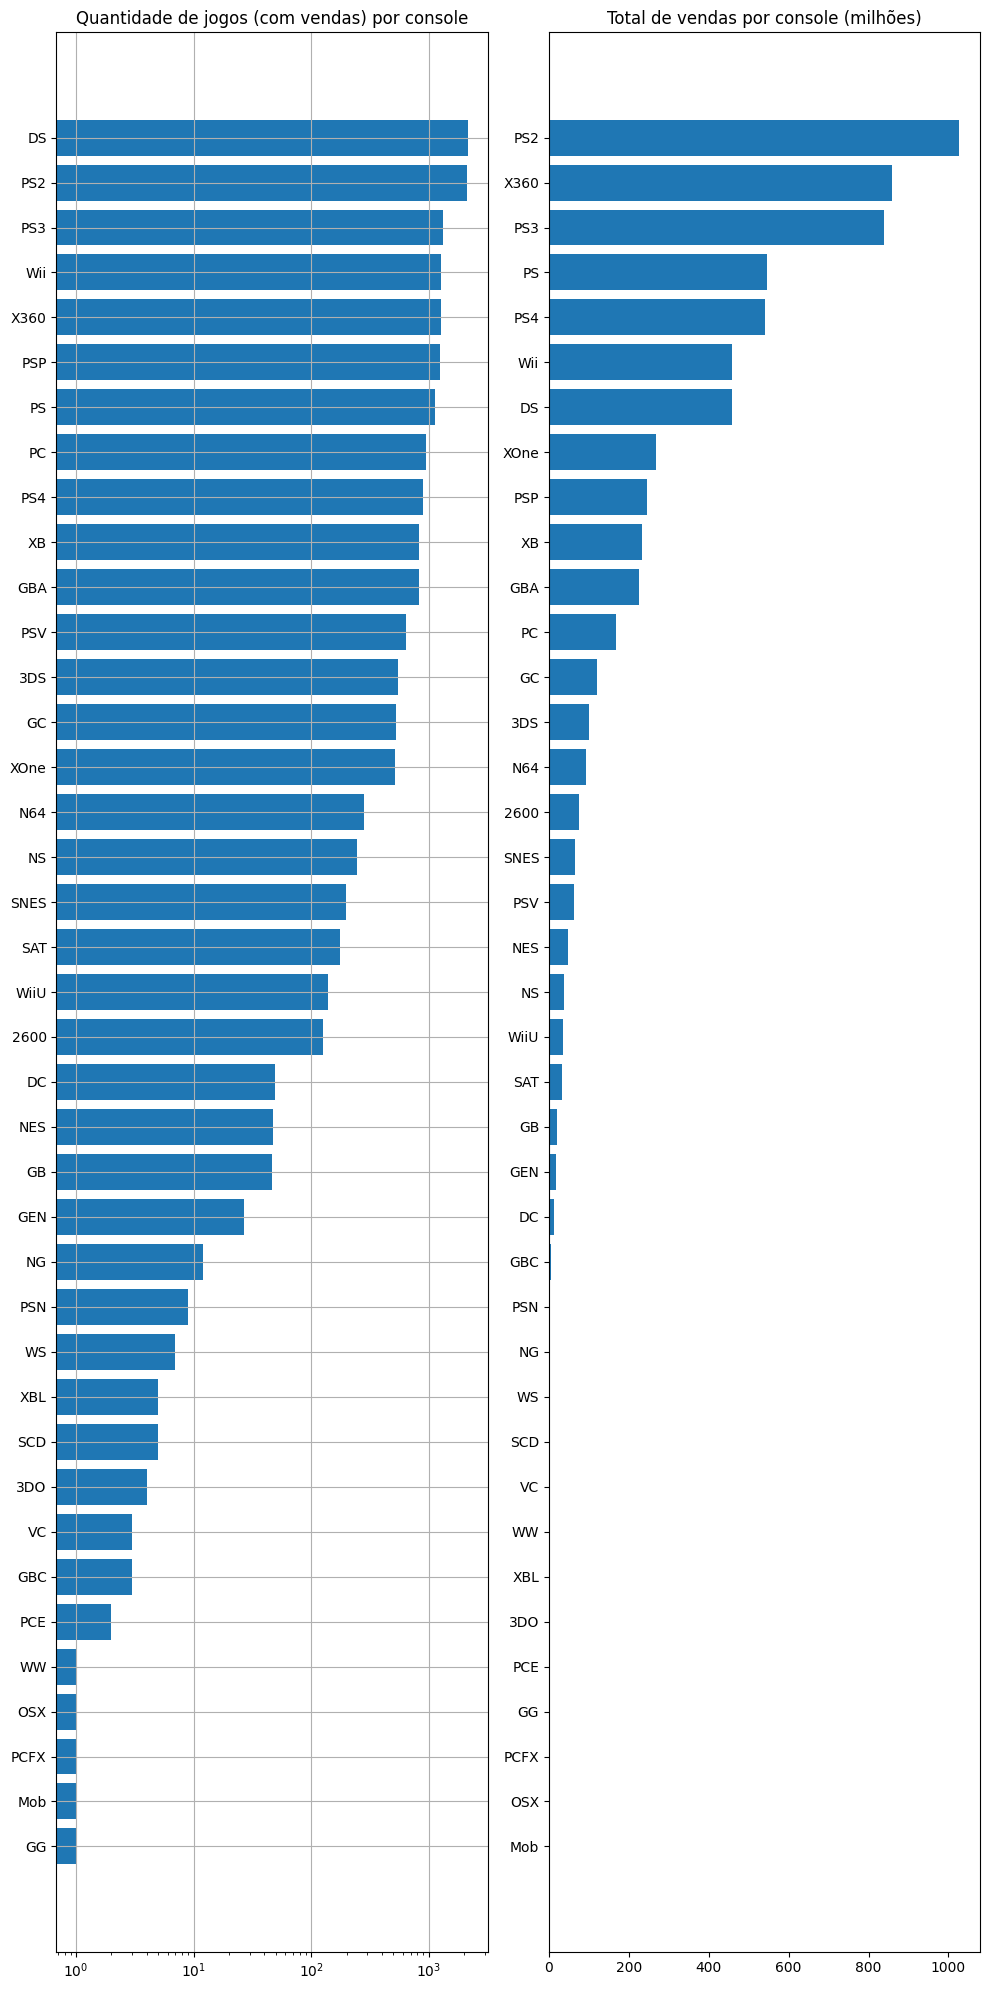

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 20))

df_gr1 = df[df["total_sales"] > 0]\
    .groupby("console").size()\
    .reset_index(name="count")\
        .sort_values(by="count", ascending=True)

df_gr2 = df[df["total_sales"] > 0][["console", "total_sales"]].groupby("console")["total_sales"].sum()\
      .reset_index().sort_values(by="total_sales", ascending=True)\


plt.subplot(1, 2, 1)
plt.barh(df_gr1["console"].tolist(), df_gr1["count"].tolist())
plt.xscale("log")
plt.grid(True)
plt.title("Quantidade de jogos (com vendas) por console")

plt.subplot(1, 2, 2)
plt.barh(df_gr2["console"].tolist(), df_gr2["total_sales"].tolist())
plt.title("Total de vendas por console (milhões)")

plt.tight_layout()

plt.show()

In [ ]:
consoles_gr1 = set(df_gr1["console"])
consoles_gr2 = set(df_gr2["console"])

top_consoles = list(consoles_gr1.intersection(consoles_gr2))

df[df["console"].isin(top_consoles)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 57352 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           57352 non-null  object 
 1   title         57352 non-null  object 
 2   console       57352 non-null  object 
 3   genre         57352 non-null  object 
 4   publisher     57352 non-null  object 
 5   developer     57335 non-null  object 
 6   critic_score  6565 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  51693 non-null  object 
 13  last_update   14334 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.6+ MB


Com isso, podemos notar a inclusão de 7000 registros no conjunto de dados sem relevância.
Podemos seguir com análise, agora se atentando propriamente a total de vendas.

In [ ]:
df[df["total_sales"] > 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 17570 entries, 0 to 17569
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           17570 non-null  object 
 1   title         17570 non-null  object 
 2   console       17570 non-null  object 
 3   genre         17570 non-null  object 
 4   publisher     17570 non-null  object 
 5   developer     17568 non-null  object 
 6   critic_score  3978 non-null   float64
 7   total_sales   17570 non-null  float64
 8   na_sales      12455 non-null  float64
 9   jp_sales      6475 non-null   float64
 10  pal_sales     11782 non-null  float64
 11  other_sales   14141 non-null  float64
 12  release_date  17508 non-null  object 
 13  last_update   3801 non-null   object 
dtypes: float64(6), object(8)
memory usage: 2.0+ MB


Mais da metade do conjunto de dados não possui informações sobre vendas.
Podemos também descartá-los.

In [ ]:
top_consoles_mask = df["console"].isin(top_consoles)
nonzero_salles = df["total_sales"] > 0

df[top_consoles_mask & nonzero_salles].info()

<class 'pandas.core.frame.DataFrame'>
Index: 17570 entries, 0 to 17569
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           17570 non-null  object 
 1   title         17570 non-null  object 
 2   console       17570 non-null  object 
 3   genre         17570 non-null  object 
 4   publisher     17570 non-null  object 
 5   developer     17568 non-null  object 
 6   critic_score  3978 non-null   float64
 7   total_sales   17570 non-null  float64
 8   na_sales      12455 non-null  float64
 9   jp_sales      6475 non-null   float64
 10  pal_sales     11782 non-null  float64
 11  other_sales   14141 non-null  float64
 12  release_date  17508 non-null  object 
 13  last_update   3801 non-null   object 
dtypes: float64(6), object(8)
memory usage: 2.0+ MB


<Axes: title={'center': 'Jogos (com vendas) lançados por década (escala logarítmica)'}, xlabel='release_decade'>

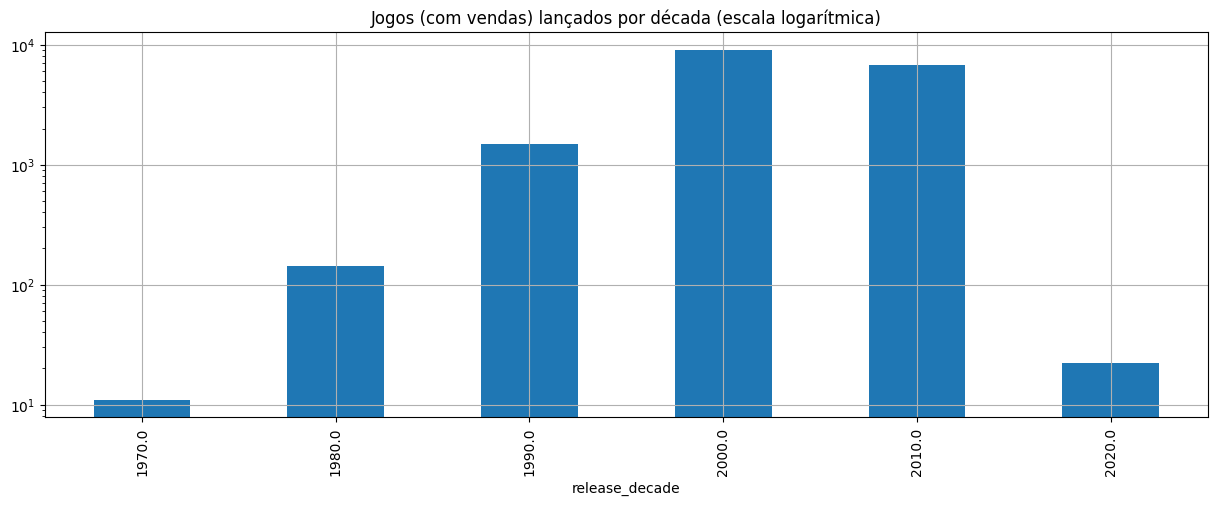

In [ ]:
df_clone = df[top_consoles_mask & nonzero_salles].copy()
df_clone["release_date"] = pd.to_datetime(df_clone["release_date"])
df_clone["release_decade"] = df_clone["release_date"].dt.year // 10 * 10

df_clone.groupby("release_decade")["release_decade"].count()\
    .plot(kind="bar", figsize=(15, 5), grid=True, logy=True, title="Jogos (com vendas) lançados por década (escala logarítmica)")       

## Gráficos

In [ ]:
df = df_clone.copy()

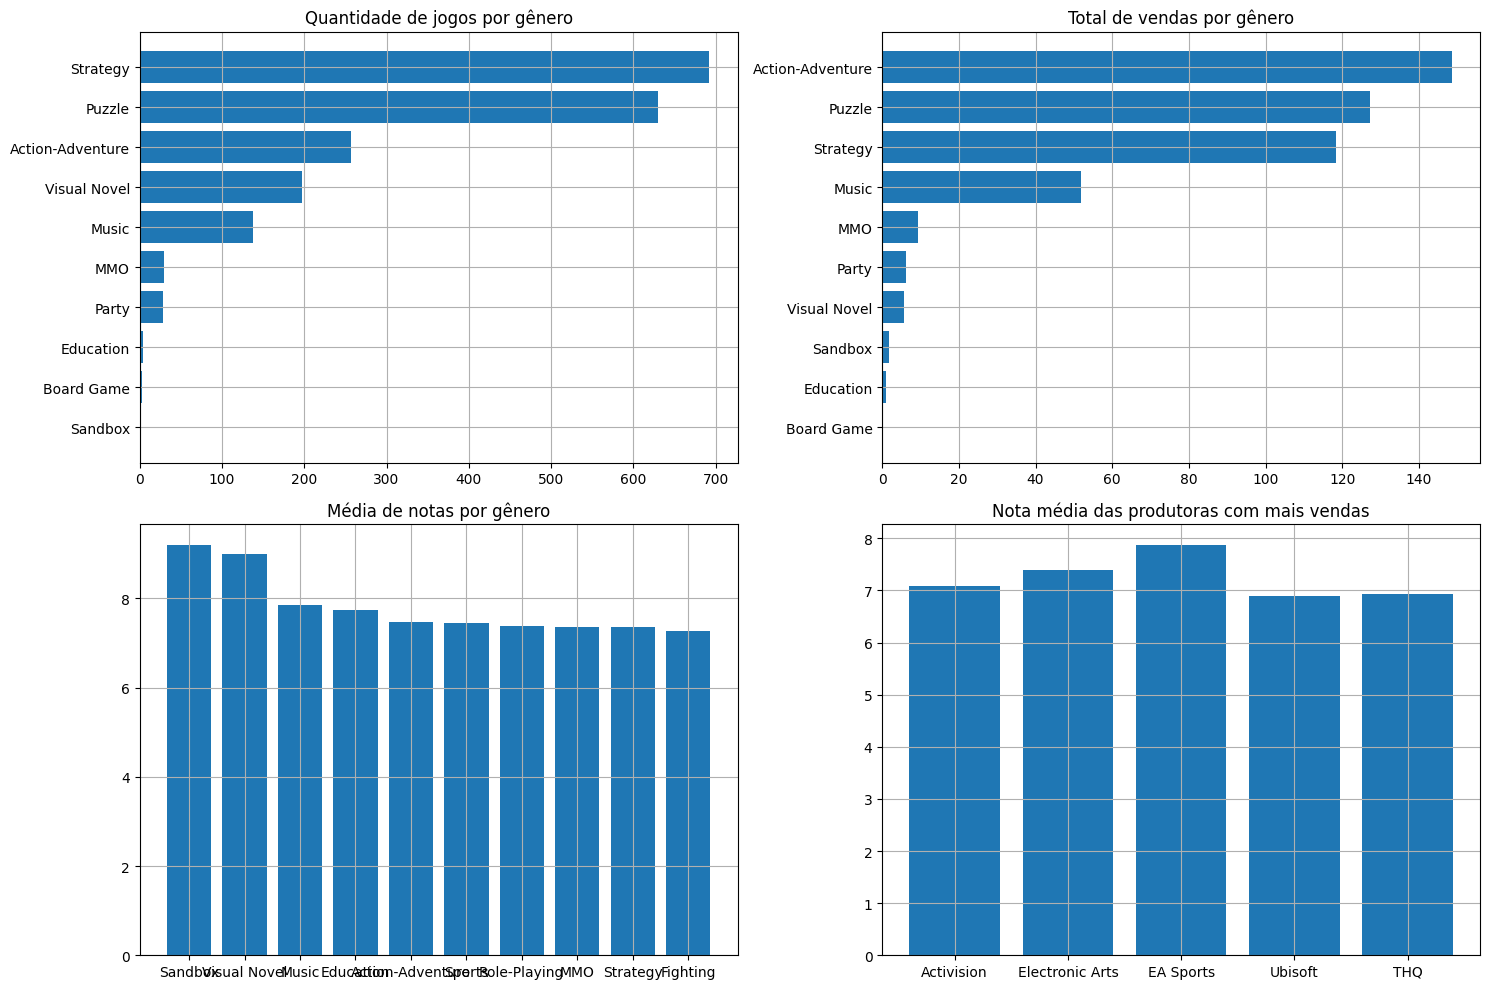

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

df_gr1 = df.groupby("genre").size()\
        .reset_index(name="count")\
        .sort_values(by="count", ascending=True)[:10]
        
plt.subplot(2, 2, 1)
plt.barh(df_gr1["genre"].tolist(), df_gr1["count"].tolist())
plt.grid(True)
plt.title("Quantidade de jogos por gênero")

df_gr2 = df[["genre", "total_sales"]].groupby("genre")["total_sales"].sum()\
        .reset_index()\
        .sort_values(by="total_sales", ascending=True)[:10]
        
plt.subplot(2, 2, 2)
plt.barh(df_gr2["genre"].tolist(), df_gr2["total_sales"].tolist())
plt.grid(True)
plt.title("Total de vendas por gênero")

df_gr3 = df[["genre", "critic_score"]].groupby("genre")["critic_score"].mean()\
        .reset_index()\
        .sort_values(by="critic_score", ascending=False)[:10]
        
plt.subplot(2, 2, 3)
plt.bar(df_gr3["genre"].tolist(), df_gr3["critic_score"].tolist())
plt.grid(True)
plt.title("Média de notas por gênero")

df_gr4 = df[["publisher", "critic_score", "total_sales"]].groupby("publisher")\
        .agg({"critic_score": "mean", "total_sales": "sum"})\
        .reset_index()\
        .sort_values(by=["total_sales", "critic_score"], ascending=False)[:5]
        
plt.subplot(2, 2, 4)
plt.bar(df_gr4["publisher"].tolist(), df_gr4["critic_score"].tolist())
plt.grid(True)
plt.title("Nota média das produtoras com mais vendas")

plt.tight_layout()
plt.show()
# df_gr4

<Axes: xlabel='release_year'>

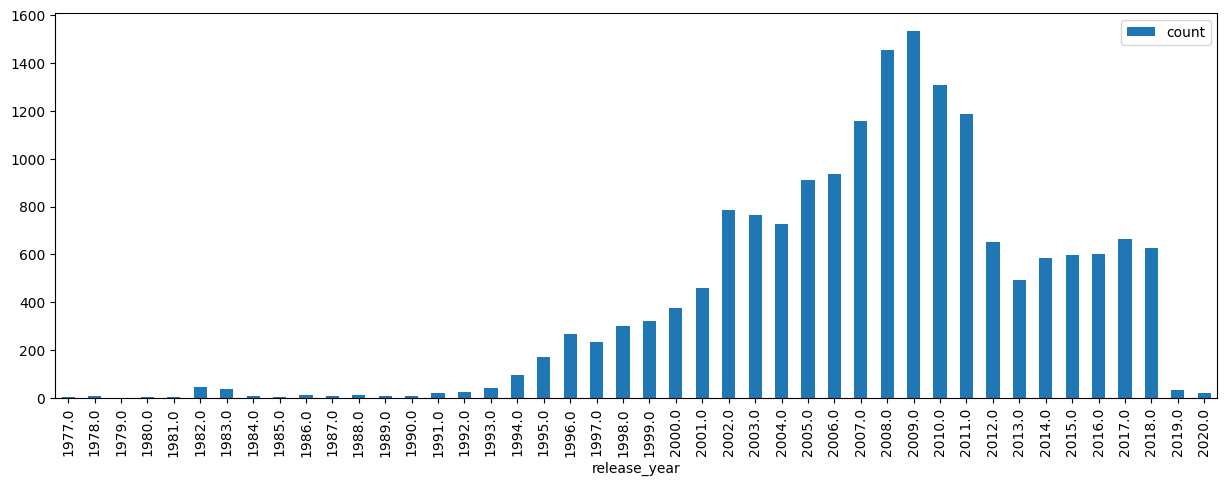

In [ ]:
df_gr5 = df.copy()
df_gr5["release_year"] = df_gr5["release_date"].dt.year
df_gr5 = df_gr5.groupby("release_year").size()\
        .reset_index(name="count")\
        .sort_values(by="release_year", ascending=True)

df_gr5.plot.bar(x="release_year", y="count", figsize=(15, 5))

## Conclusões finais

Considerando os gráficos expostos que motivaram o desenvolvimento do front-end, podemos chegar às seguintes conclusões:
* Algumas colunas podem ser descartadas para envio do conjunto de daddos, podendo ser consultadas individualmente. É o caso de: `img`, `title`, `last_update`.(Por enquanto `developer` ocupa uma posição não útil por enquanto, mas também não descartável).
* Deveram haver duas principais funções no back-end: uma responsável por enviar os dados para geração de gráficos e outra para enviar dados individuais de cada jogo.
* A primeira vista uma vista uma função mais genralista para filtragem dos dados pode gerar benefícios para o desenvolvimento.
* Deveram haver funções para envio das listas para filtragem.

In [ ]:
df[["img", "title", "developer", "last_update"]].info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17570 entries, 0 to 17569
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   img          17570 non-null  object
 1   title        17570 non-null  object
 2   developer    17568 non-null  object
 3   last_update  3801 non-null   object
dtypes: object(4)
memory usage: 686.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 17570 entries, 0 to 17569
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   img             17570 non-null  object        
 1   title           17570 non-null  object        
 2   console         17570 non-null  object        
 3   genre           17570 non-null  object        
 4   publisher       17570 non-null  object        
 5   developer       17568 non-null  object        
 6   critic_score    3978 non-null   float64       
 7   total_sales     17570 non-null  

In [ ]:
# df["other_sales"] = df["total_sales"] - df["na_sales"] - df[ "jp_sales"] - df[ "pal_sales"]
# if "last_update" in df: df.drop(columns=["last_update"], inplace=True)
# if "release_decade" in df: df.drop(columns=["release_decade"], inplace=True)

# df = df[df["total_sales"] > 0]

# df.rename(columns={
#     "img": "imgUrl",
#     "title": "title",
#     "console": "console",
#     "genre": "genre",
#     "publisher": "publisher",
#     "developer": "developer",
#     "critic_score": "criticScore",
#     "total_score": "totalScore",
#     "na_sales": "northAmericaSales",
#     "jp_sales": "japanSales",
#     "pal_sales": "europeAfricaSales",
#     "other_sales": "otherSales",
#     "release_date": "releaseDate",
#     "last_update": "lastUpdate",
# })

# df.to_json("data.json", orient="records")

In [ ]:
len(df)

NameError: name 'df' is not defined